In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import gc

## Lecture des données

In [2]:
data=pd.read_csv('./villes.csv',sep=';',header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
1,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
2,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9


In [16]:
X=data.iloc[:,1:].values
labels=data.iloc[:,0].values

## Importation des bibliothèques

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
X[1:]

array([['7.7', '8.7', '10.5', '12.6', '15.9', '19.8', '22.0', '22.2',
        '20.3', '16.3', '11.8', '8.7'],
       ['4.2', '4.9', '7.9', '10.4', '13.6', '17.0', '18.7', '18.4',
        '16.1', '11.7', '7.6', '4.9'],
       ['4.6', '5.4', '8.9', '11.3', '14.5', '17.2', '19.5', '19.4',
        '16.9', '12.5', '8.1', '5.3'],
       ['1.1', '2.2', '6.4', '9.7', '13.6', '16.9', '18.7', '18.3',
        '15.5', '10.4', '5.7', '2.0'],
       ['7.6', '8.0', '10.8', '12.0', '14.7', '17.8', '19.7', '19.9',
        '18.5', '14.8', '10.9', '8.2'],
       ['5.6', '6.6', '10.3', '12.8', '15.8', '19.3', '20.9', '21.0',
        '18.6', '13.8', '9.1', '6.2'],
       ['6.1', '5.8', '7.8', '9.2', '11.6', '14.4', '15.6', '16.0',
        '14.7', '12.0', '9.0', '7.0'],
       ['2.6', '3.7', '7.5', '10.3', '13.8', '17.3', '19.4', '19.1',
        '16.2', '11.2', '6.6', '3.6'],
       ['1.3', '2.6', '6.9', '10.4', '14.3', '17.7', '19.6', '19.0',
        '15.9', '10.5', '5.7', '2.1'],
       ['0.5', '1.6', '5.

## Normalisation

In [21]:
SS=StandardScaler()
SS.fit(X[1:])
Xnorm=SS.transform(X[1:])

#Xnorm=SS.fit_transform(X) ###A éviter quand des futures de données peuvent arriver

In [22]:
Xnorm[0,:]

array([1.63835106, 1.78748032, 1.35686597, 1.16748094, 1.09413658,
       1.2081338 , 1.11734499, 1.39767179, 1.73963204, 1.93208186,
       1.82836605, 1.68024825])

## PCA

In [23]:
pca=PCA(n_components=2)
pca.fit(Xnorm)

PCA(n_components=2)

### Les valeurs propres sélectionnées

In [24]:
pca.explained_variance_

array([10.80999558,  1.45184229])

### Information (variance) expriquée par valauer propre

In [25]:
pca.explained_variance_ratio_

array([0.87268193, 0.11720602])

### Interprétation des axes

In [26]:
pca.components_

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688]])

#### Axe 1

In [29]:
pca.components_[0,:]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

#### Axe 2

In [30]:
pca.components_[1,:]

array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

### Cercle de correlartion

KeyError: 0

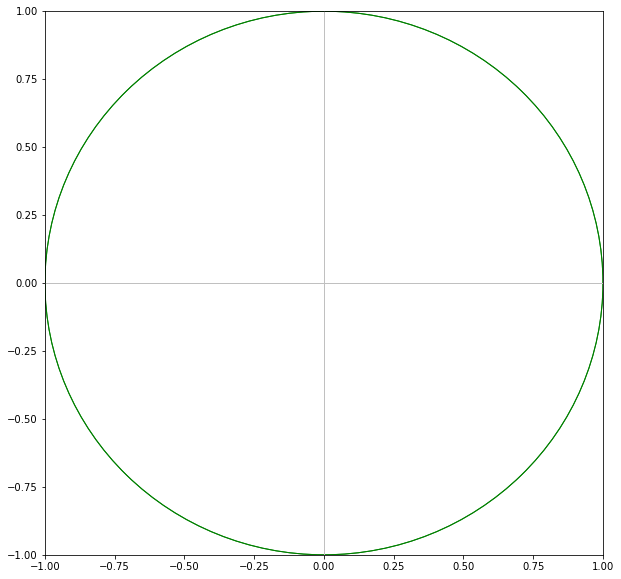

In [31]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]

pc_infos = pd.DataFrame(coef, columns=cols, index=data.iloc[:,1:].columns)


plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")


### Projection des données sur les nouveaux axes

In [32]:
X_pca=pca.transform(Xnorm)

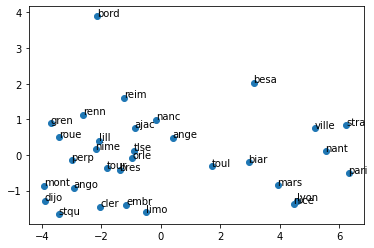

In [33]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


In [34]:
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

def print_top_comp(components, feature_names, n_top_comp):
    taille=feature_names.shape[0]
    seuil=1/np.sqrt(taille)
    for comp_idx, topic in enumerate(components):
        Y=np.abs(topic)
        feature_pos=feature_names[topic>seuil]
        feature_neg=feature_names[topic<=-seuil]
        n_top_comp_pos=min(n_top_comp,feature_pos.shape[0])
        n_top_comp_neg=min(n_top_comp,feature_neg.shape[0])


        feature_pos=feature_names[topic.argsort()[::-1][:n_top_comp_pos]]
        feature_neg=feature_names[topic.argsort()[:n_top_comp_neg]]
        fea=np.concatenate((feature_pos,feature_neg))
        com_pos=np.sort(topic)[::-1][:n_top_comp_pos]
        com_neg=np.sort(topic)[:n_top_comp_neg]
        com=np.concatenate((com_pos,com_neg))

                
        c_normal = colors.PowerNorm(1,vmin=min(com),vmax=max(com))
        _COLORS = cmap(c_normal(com))

      
        components = pd.DataFrame(np.array(com),index =fea) 
        fig, ax = plt.subplots(figsize = (5,3))
        # Plot the feature weights as a function of the components
        components.plot(ax = ax, kind = 'bar',align = "center", color=_COLORS)
        #plt.xlabel("Dimension #%d " % comp_idx)
        ax.set_ylabel("Feature Weights") 
        red_patch = mpatches.Patch(color='red', label="Variable-%d " % (comp_idx+1))
        ax.legend(handles=[red_patch])
        plt.show()

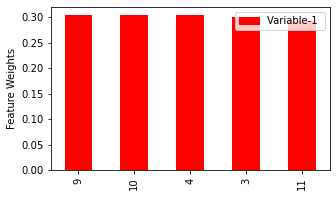

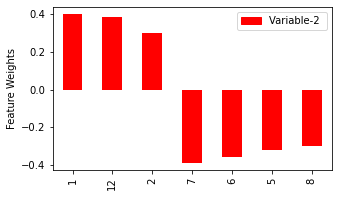

In [35]:
print_top_comp(pca.components_, data.columns[1:], 12)

# Clustering

## KMeans

In [36]:
from sklearn.cluster import KMeans

In [37]:
KM=KMeans(n_clusters=3,init='random')
KM.fit(Xnorm)
clustering=KM.labels_
#clustering=KM.predict(Xnorm)


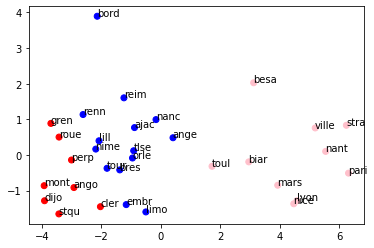

In [38]:
import matplotlib.colors as col

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=col.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-0.2, 0.2),
        textcoords='offset points')

plt.show()

In [39]:
from sklearn.metrics import silhouette_score

for i in np.arange(2, 10):
    KM = KMeans(n_clusters=i)
    KM.fit(Xnorm)
    clustering=KM.labels_
    score=silhouette_score(Xnorm, clustering,metric='euclidean')
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i,score))
    print()
    

La silhouette index pour 2 classes est 0.625558

La silhouette index pour 3 classes est 0.388094

La silhouette index pour 4 classes est 0.361515

La silhouette index pour 5 classes est 0.318827

La silhouette index pour 6 classes est 0.293482

La silhouette index pour 7 classes est 0.337097

La silhouette index pour 8 classes est 0.371743

La silhouette index pour 9 classes est 0.373534



## CAH

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
CAH=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
CAH.fit(Xnorm)
clustering=CAH.labels_

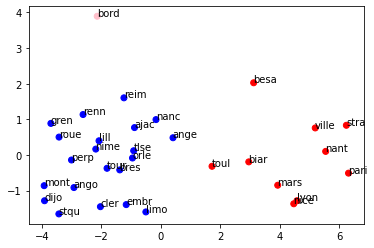

In [42]:
import matplotlib.colors as col

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=col.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-0.2, 0.2),
        textcoords='offset points')

plt.show()

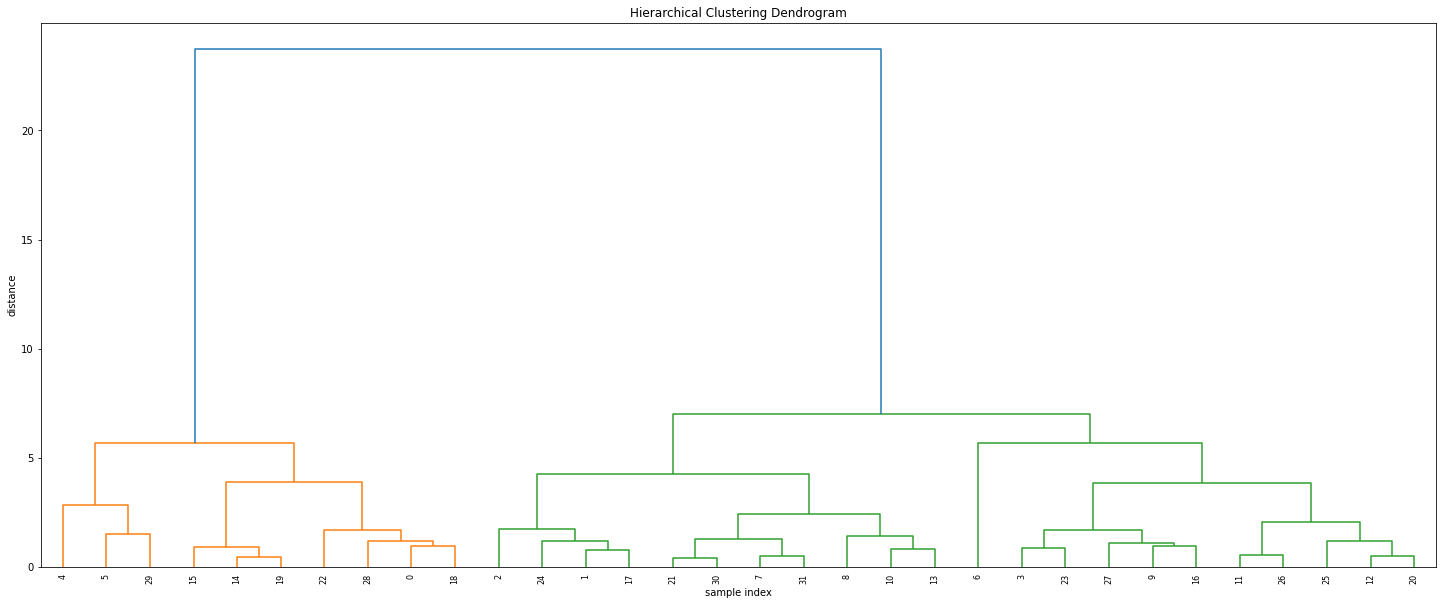

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(Xnorm, 'ward')   # Essayer ward
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

for i in np.arange(2, 10):
    CAH = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='single')
    CAH.fit(Xnorm)
    clustering=CAH.labels_
    score=silhouette_score(Xnorm, clustering,metric='euclidean')
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i,score))
    print()
    

La silhouette index pour 2 classes est 0.178289

La silhouette index pour 3 classes est -0.034405

La silhouette index pour 4 classes est 0.183218

La silhouette index pour 5 classes est 0.405383

La silhouette index pour 6 classes est 0.321177

La silhouette index pour 7 classes est 0.331479

La silhouette index pour 8 classes est 0.190927

La silhouette index pour 9 classes est 0.158335



In [44]:
from sklearn.metrics import silhouette_score

for i in np.arange(2, 10):
    CAH = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='average')
    CAH.fit(Xnorm)
    clustering=CAH.labels_
    score=silhouette_score(Xnorm, clustering,metric='euclidean')
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i,score))
    print()
    

La silhouette index pour 2 classes est 0.625558

La silhouette index pour 3 classes est 0.495687

La silhouette index pour 4 classes est 0.404092

La silhouette index pour 5 classes est 0.339438

La silhouette index pour 6 classes est 0.315709

La silhouette index pour 7 classes est 0.349161

La silhouette index pour 8 classes est 0.342195

La silhouette index pour 9 classes est 0.336865



In [45]:
from sklearn.metrics import silhouette_score

for i in np.arange(2, 10):
    CAH = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    CAH.fit(Xnorm)
    clustering=CAH.labels_
    score=silhouette_score(Xnorm, clustering,metric='euclidean')
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i,score))
    print()
    

La silhouette index pour 2 classes est 0.625558

La silhouette index pour 3 classes est 0.368078

La silhouette index pour 4 classes est 0.318251

La silhouette index pour 5 classes est 0.332732

La silhouette index pour 6 classes est 0.321341

La silhouette index pour 7 classes est 0.336163

La silhouette index pour 8 classes est 0.344596

La silhouette index pour 9 classes est 0.348811



In [1]:
# Le meilleur algorithme pour 3 classes est CAH avec Average comme critère d'agrégation ce qui confirme que Brest 
# est un outlier et doit être tout seul